In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
from statistics.pmf import PMF
from statistics.OA import OA, genOA, genFiltrations
from statistics.OAIso import allIsomorphisms
from persistence.pers import compute_perm_classes, persistencePairs, WasDistances, BotDistances, L2Distances, AvgDistances, DistancesDistr, wassersteinDistanceDiags
#from geometry.polytope import Polytope, computePolytope
#from geometry.polytope import conditionsOA3, conditionsOA4, conditionsOA5

from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [3]:
conditions = { 3 : conditionsOA3 , 4 : conditionsOA4 , 5 : conditionsOA5}

NameError: name 'conditionsOA3' is not defined

In [5]:
NSwitches = 3

In [5]:
resultPmf = []
NResamples = 3

for d in [3]:
    for N in [20]:
        
        OAF = []
        
        cond = conditions[d]
        ptp = computePolytope(d , cond)
        rays = ptp.Rays
        
        oas , _ , _ = genOA(N,d)
        
        for oa in oas:
            OAF.append(oa)
            for _ in range(NResamples):
                OAF.append(oa.randSwitchIsomorphism(2, canonical=True))
                
        pmfs = [arr.to_pmf(normalize=True).values for arr in OAF ]
        pmfs = np.column_stack(pmfs)
        
        distancesPmf = distance_matrix(pmfs, pmfs, 2)
        distancesRays = distance_matrix(rays, rays, 2)
        
        AvgInPmf , _ = AvgDistances(distancesPmf, NSwitches+1)
        AvgRays = np.mean(np.ravel(distancesRays))
        
        resultPmf.append( ( "( {} , {} )".format(N,d) , AvgInPmf , AvgRays ) )

In [6]:
resultPmf

[('( 20 , 3 )', 0.3944053188733077, 0.1767766952966369)]

In [7]:
resultWas = []
NResamples = 3

for d in [3,4,5]:
    for N in [20,24]:
        
        OAF = []
        
        oas , _ , _ = genOA(N,d)
        
        for oa in oas:
            OAF.append(oa)
            for _ in range(NResamples):
                OAF.append(oa.randSwitchIsomorphism(2, canonical=True))
                
        filts = [arr.to_pmf(normalize=True).compute_filtration() for arr in OAF ]
        filts = np.column_stack(filts)
        
        
        dist = WasDistances(filts , d)

        
        AvgInWas , AvgOutWas = AvgDistances(dist, NSwitches+1)
        
        resultWas.append( ( "( {} , {} )".format(N,d) , AvgInWas , AvgOutWas ) )

In [8]:
resultWas

[('( 20 , 3 )', 0.0, 0.06666666666666665),
 ('( 24 , 3 )', 0.0, 0.0694444444444439),
 ('( 20 , 4 )', 0.01666666666666686, 0.07458122890254891),
 ('( 24 , 4 )', 0.0, 0.08235289397866158),
 ('( 20 , 5 )', 0.06558876095930063, 0.1663092879996761),
 ('( 24 , 5 )', 0.03764571483980744, 0.17515737572947163)]

## Bottleneck distances

In [14]:
resultBot = []
NResamples = 3

for d in [3,4,5]:
    for N in [20,24]:
        
        OAF = []
        
        oas , _ , _ = genOA(N,d)
        
        for oa in oas:
            OAF.append(oa)
            for _ in range(NResamples):
                OAF.append(oa.randSwitchIsomorphism(2, canonical=True))
                
        filts = [arr.to_pmf(normalize=True).compute_filtration() for arr in OAF ]
        filts = np.column_stack(filts)
        
        
        dist = BotDistances(filts , d)

        
        AvgInBot , AvgOutBot = AvgDistances(dist, NSwitches+1)
        
        resultBot.append( ( "( {} , {} )".format(N,d) , AvgInBot , AvgOutBot ) )

In [16]:
resultBot

[('( 20 , 3 )', 0.0, 0.06666666666666664),
 ('( 24 , 3 )', 0.0, 0.06944444444444449),
 ('( 20 , 4 )', 0.01111111111111112, 0.041666666666666685),
 ('( 24 , 4 )', 0.0, 0.03148148148148145),
 ('( 20 , 5 )', 0.018181818181818184, 0.04710227272727238),
 ('( 24 , 5 )', 0.009810405643738952, 0.04063860087045813)]

In [9]:
res = np.load('resultWas.npy')

In [23]:
res[:,2:4].astype(float)

array([[0.        , 0.06666667],
       [0.        , 0.06944444],
       [0.009319  , 0.07667214],
       [0.        , 0.08235289],
       [0.05344277, 0.1591138 ],
       [0.03319784, 0.17521031]])

## Prova

In [30]:
OAF = []
NResamples = 10
d = 5
N = 20

oas , _ , _ = genOA(N,d)

for oa in oas:
    OAF.append(oa)
    for _ in range(NResamples):
        OAF.append(oa.randSwitchIsomorphism(2, canonical=True))
        
        
pmfs = [arr.to_pmf(normalize=True).values for arr in OAF ]
pmfs = np.column_stack(pmfs)

filts = [arr.to_pmf(normalize=True).compute_filtration() for arr in OAF ]
filts = np.column_stack(filts)


dist = WasDistances(filts , d, noDiag=True)

In [31]:
InDist, OutDist = DistancesDistr(dist, NResamples + 1)

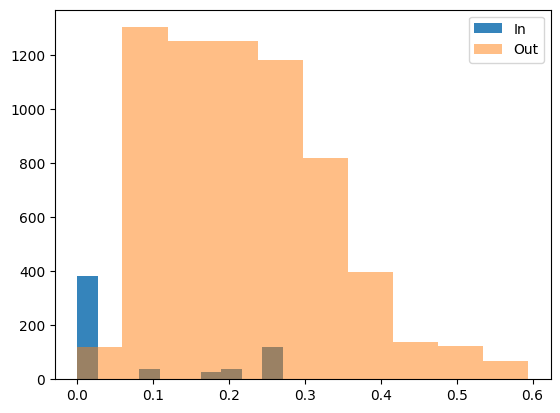

In [38]:
plt.hist(InDist, alpha=0.9, label='In');
plt.hist(OutDist, alpha=0.5, label='Out');
plt.legend()

In [ ]:
WasDistances

In [33]:
smallvals = [x for x in OutDist if x < 0.001 ]

In [34]:
len(OutDist)

6655

In [35]:
len(smallvals)

30

In [36]:
smallvals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
oas , _ , _ = genOA(20,3)

In [11]:
OAF = []
for oa in oas:
    OAF.append(oa)
    for _ in range(5):
        OAF.append(oa.randSwitchIsomorphism(2, canonical=True))

In [12]:
OAF

In [13]:
pmfs = [arr.to_pmf(normalize=True).values for arr in OAF ]
pmfs = np.column_stack(pmfs)

In [23]:
L2dist = L2Distances(pmfs,3)
L2dist.shape

(18, 18)

In [27]:
indist, outdist = DistancesDistr(L2dist, 6)


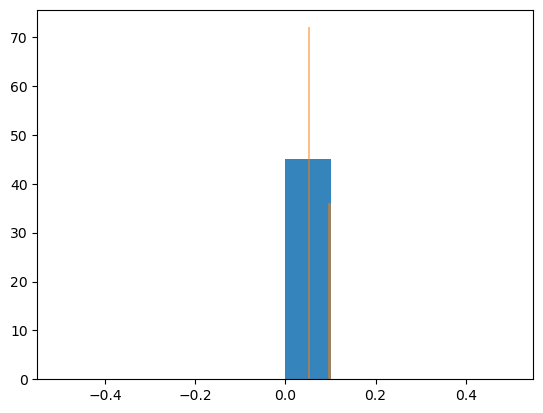

In [29]:
plt.hist(indist, alpha=0.9);
plt.hist(outdist, alpha=0.5);

In [10]:
pmfs.shape

(8, 12)

In [14]:
dist = distance_matrix(pmfs.T, pmfs.T)

In [15]:
dist.shape

(12, 12)

In [5]:
oas, _ , _ = genOA(20,4)

In [61]:
print(oas[0], '\n', oas[1], '\n',oas[2])

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [0 1 1 1]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 1]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 0 1]
 [1 1 1 0]] 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]] 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 0]]


In [91]:
OAF = []
switches = []
for oa in oas:
    OAF.append(oa)
    switches.append( [] )
    for _ in range(3):
        newOA, cols = oa.randSwitchIsomorphism(3, canonical=True, returnSwitch=True)
        OAF.append(newOA)
        switches.append(cols)

In [92]:
switches = [ list(sorted(s)) for s in switches ]
        

In [93]:
switches

[[],
 [1, 2, 3],
 [1, 2, 3],
 [0, 1, 3],
 [],
 [0, 1, 3],
 [0, 2, 3],
 [1, 2, 3],
 [],
 [0, 2, 3],
 [0, 1, 2],
 [1, 2, 3]]

In [94]:
filts = [arr.to_pmf(normalize=True).compute_filtration() for arr in OAF ]
filts = np.column_stack(filts)

In [95]:
dist = WasDistances(filts , 4)

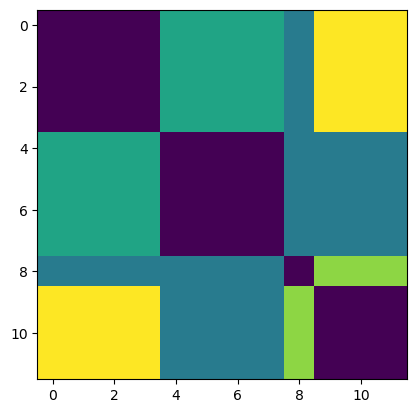

In [96]:
plt.imshow(dist)

In [69]:
dist

array([[0.        , 0.        , 0.        , 0.        , 0.07071068,
        0.07071068, 0.07071068, 0.07071068, 0.05      , 0.12071068,
        0.12071068, 0.05      ],
       [0.        , 0.        , 0.        , 0.        , 0.07071068,
        0.07071068, 0.07071068, 0.07071068, 0.05      , 0.12071068,
        0.12071068, 0.05      ],
       [0.        , 0.        , 0.        , 0.        , 0.07071068,
        0.07071068, 0.07071068, 0.07071068, 0.05      , 0.12071068,
        0.12071068, 0.05      ],
       [0.        , 0.        , 0.        , 0.        , 0.07071068,
        0.07071068, 0.07071068, 0.07071068, 0.05      , 0.12071068,
        0.12071068, 0.05      ],
       [0.07071068, 0.07071068, 0.07071068, 0.07071068, 0.        ,
        0.        , 0.        , 0.        , 0.05      , 0.05      ,
        0.05      , 0.05      ],
       [0.07071068, 0.07071068, 0.07071068, 0.07071068, 0.        ,
        0.        , 0.        , 0.        , 0.05      , 0.05      ,
        0.05      ,

In [78]:
print(OAF[-3])

[[0 1 1 1]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 0 1 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 1]]


In [73]:
print(OAF[-2])

[[1 1 0 1]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [0 0 1 1]]


In [74]:
print(OAF[-3])

[[0 1 1 1]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 0 1 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 1]]


# here

In [97]:
pmf8 = OAF[8].to_pmf(normalize=True)
pmf9 = OAF[9].to_pmf(normalize=True)
pmf10 = OAF[10].to_pmf(normalize=True)
pmf11 = OAF[11].to_pmf(normalize=True)

In [98]:
filt8 = pmf8.compute_filtration()
filt9 = pmf9.compute_filtration()
filt10 = pmf10.compute_filtration()
filt11 = pmf11.compute_filtration()

In [99]:
filt8

array([[0.  ],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.75],
       [0.9 ],
       [0.9 ],
       [1.  ]])

In [100]:
dgm8 = persistencePairs(filt8,4)
dgm8

([[2, 3],
  [4, 5],
  [8, 9],
  [6, 7],
  [10, 11],
  [12, 13],
  [14, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 1.0],
  [0.0, inf],
  [0.5, inf]])

In [102]:
filt9

array([[0.  ],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.75],
       [0.9 ],
       [0.85],
       [0.95]])

In [101]:
dgm9 = persistencePairs(filt9,4)
dgm9

([[2, 3],
  [4, 5],
  [8, 9],
  [12, 14],
  [6, 7],
  [10, 11],
  [13, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.85],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 0.95],
  [0.0, inf],
  [0.5, inf]])

In [107]:
filt10

array([[0.  ],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.85],
       [0.75],
       [0.9 ],
       [0.9 ],
       [0.95]])

In [106]:
dgm10 = persistencePairs(filt10,4)
dgm10

([[2, 3],
  [4, 5],
  [8, 9],
  [10, 11],
  [6, 7],
  [12, 13],
  [14, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.85],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 0.95],
  [0.0, inf],
  [0.5, inf]])

In [104]:
dgm11 = persistencePairs(filt11,4)
dgm11

([[2, 3],
  [4, 5],
  [8, 9],
  [6, 7],
  [10, 11],
  [12, 13],
  [14, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.85],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 0.95],
  [0.0, inf],
  [0.5, inf]])

In [105]:
switches

[[],
 [1, 2, 3],
 [1, 2, 3],
 [0, 1, 3],
 [],
 [0, 1, 3],
 [0, 2, 3],
 [1, 2, 3],
 [],
 [0, 2, 3],
 [0, 1, 2],
 [1, 2, 3]]

In [114]:
import persim
persim.wasserstein(dgm4,dgm3, matching=True)

/opt/conda/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(


(0.10000000000000116,
 array([[0.  , 0.  , 0.  ],
        [1.  , 1.  , 0.  ],
        [2.  , 2.  , 0.  ],
        [3.  , 4.  , 0.  ],
        [4.  , 5.  , 0.  ],
        [5.  , 3.  , 0.05],
        [6.  , 6.  , 0.05]]))

In [118]:
dgm3 = [x for x in dgm3 if x[1]!=np.infty ]
dgm4 = [x for x in dgm4 if x[1]!=np.infty ]

In [123]:
dgm3

[[0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.75, 0.85],
 [0.75, 0.9],
 [0.75, 0.9],
 [0.9, 0.95]]

In [124]:
dgm4

[[0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.75, 0.9],
 [0.75, 0.9],
 [0.75, 0.9],
 [0.9, 1.0]]

In [122]:
persim.wasserstein(dgm3, dgm4, matching=True)

(0.10000000000000116,
 array([[0.  , 0.  , 0.  ],
        [1.  , 1.  , 0.  ],
        [2.  , 2.  , 0.  ],
        [3.  , 3.  , 0.05],
        [4.  , 4.  , 0.  ],
        [5.  , 5.  , 0.  ],
        [6.  , 6.  , 0.05]]))

In [129]:
print(pmf4, pmf3)

[[0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.1 ]
 [0.1 ]
 [0.  ]] [[0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.  ]
 [0.1 ]
 [0.1 ]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]
 [0.05]]


In [136]:
dist[4,9]

0.05000000000000169

In [140]:
oas,_,_ = genOA(24,5)

In [141]:
len(oas)

63

In [143]:
len(OAF)

12

In [145]:
arr10 = OAF[-2]
pmf10 = arr10.to_pmf(normalize=True)

In [148]:
filt10 = pmf10.compute_filtration()

In [149]:
filt10

array([[0.  ],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.75],
       [0.85],
       [0.9 ],
       [0.95]])

In [150]:
dgm10 = persistencePairs(filt10,4)

In [151]:
dgm10

([[2, 5],
  [3, 6],
  [4, 8],
  [10, 11],
  [7, 12],
  [9, 13],
  [14, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.85],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 0.95],
  [0.0, inf],
  [0.5, inf]])

In [152]:
dgm4

[[0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.75, 0.9],
 [0.75, 0.9],
 [0.75, 0.9],
 [0.9, 1.0]]

In [153]:
filt4

array([[0.  ],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.9 ],
       [0.75],
       [0.9 ],
       [0.9 ],
       [1.  ]])

In [155]:
dgm8 = persistencePairs(filt4, d=4)

In [156]:
dgm8

([[2, 5],
  [3, 6],
  [4, 8],
  [7, 11],
  [9, 12],
  [10, 13],
  [14, 15],
  [0, inf],
  [1, inf]],
 [[0.5, 0.75],
  [0.5, 0.75],
  [0.5, 0.75],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.75, 0.9],
  [0.9, 1.0],
  [0.0, inf],
  [0.5, inf]])

In [158]:
print(pmf10)

[[0.1 ]
 [0.05]
 [0.  ]
 [0.1 ]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]]


In [160]:
print(pmf4)

[[0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.05]
 [0.05]
 [0.1 ]
 [0.05]
 [0.1 ]
 [0.1 ]
 [0.  ]]


## Distances

In [163]:
dist = np.load('./data/WasDists_N_24_d_5-NC.npy')

In [165]:
dist.shape

(1323, 1323)

In [169]:
InDistr, OutDistr = DistancesDistr(dist, 21)

In [172]:
OutDistr = np.array(OutDistr)

In [180]:
smalls = OutDistr[ OutDistr < .00000001]

In [181]:
smalls.shape

(169,)

In [182]:
smalls

array([4.99600361e-16, 4.99600361e-16, 4.99600361e-16, 4.99600361e-16,
       4.99600361e-16, 4.99600361e-16, 4.99600361e-16, 4.99600361e-16,
       4.99600361e-16, 4.99600361e-16, 4.99600361e-16, 4.99600361e-16,
       4.99600361e-16, 4.99600361e-16, 4.99600361e-16, 4.99600361e-16,
       4.99600361e-16, 4.40914474e-16, 4.40914474e-16, 4.40914474e-16,
       4.40914474e-16, 4.40914474e-16, 4.40914474e-16, 4.71844785e-16,
       4.71844785e-16, 4.71844785e-16, 4.71844785e-16, 4.40914474e-16,
       4.40914474e-16, 4.40914474e-16, 4.71844785e-16, 4.71844785e-16,
       4.71844785e-16, 4.71844785e-16, 4.40914474e-16, 4.40914474e-16,
       4.40914474e-16, 4.71844785e-16, 4.71844785e-16, 4.71844785e-16,
       4.71844785e-16, 4.40914474e-16, 4.40914474e-16, 4.40914474e-16,
       4.71844785e-16, 4.71844785e-16, 4.71844785e-16, 4.71844785e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# Case d=6

In [5]:
resultBot = []
NResamples = 3

for d in [6]:
    for N in [20]:
        
        OAF = []
        
        oas , _ , _ = genOA(N,d)
        
        for oa in oas:
            OAF.append(oa)
            for _ in range(NResamples):
                OAF.append(oa.randSwitchIsomorphism(2, canonical=True))
                
        filts = [arr.to_pmf(normalize=True).compute_filtration() for arr in OAF ]
        filts = np.column_stack(filts)
        
        
        dist = BotDistances(filts , d)

        
        AvgInBot , AvgOutBot = AvgDistances(dist, NSwitches+1)
        
        resultBot.append( ( "( {} , {} )".format(N,d) , AvgInBot , AvgOutBot ) )

KeyboardInterrupt: 

In [11]:
from persistence.distances import wasserstein2DNoDiag, wasserstein1D

In [12]:
vals1 = [3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 0, 0, 0, 0, 0]
vals2 = [3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0, 1, 0, 0, 0]

vals1 = [2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0]
vals2 = [2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0]

p1 = PMF(5, vals1, one=False)
p2 = PMF(5, vals2, one=False)

In [13]:
f1 = p1.normalize().compute_filtration()
f2 = p2.normalize().compute_filtration()

filtrations = np.column_stack([f1,f2])
filtrations.shape

(32, 2)

In [14]:
wasserstein1D(p1.values,p2.values)

0.0

In [15]:
wasserstein1D(f1,f2)

1.1102230246251565e-16

In [10]:
from persistence.distances import wasserstein2DNoDiag, wasserstein1D

In [16]:
pd1 = persistencePairs(f1,5)
pd1 = pd1[1]
pd2 = persistencePairs(f2,5)
pd2 = pd2[1]

In [17]:
wasserstein2DNoDiag(pd1, pd2)

2.1073424255447017e-08

In [18]:
pd1

[[0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.75, 0.8333333333333334],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.9166666666666666, 0.9166666666666666],
 [0.75, 0.9166666666666666],
 [0.9166666666666666, 0.9583333333333334],
 [0.9166666666666666, 0.9583333333333334],
 [0.9166666666666666, 1.0],
 [1.0, 1.0],
 [0.0, inf],
 [0.5, inf]]

In [19]:
pd2

[[0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.5, 0.75],
 [0.75, 0.8333333333333334],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.75, 0.875],
 [0.9166666666666666, 0.9166666666666666],
 [0.75, 0.9166666666666666],
 [0.9166666666666666, 0.9583333333333334],
 [0.9166666666666666, 0.9583333333333334],
 [0.9166666666666666, 1.0],
 [1.0, 1.0],
 [1.1102230246251565e-16, inf],
 [0.5, inf]]

In [20]:
from statistics.OAIso import allSwitchIsomorphisms

In [21]:
perms = allSwitchIsomorphisms(5)

In [22]:
perms.shape

(32, 32)

In [23]:
perms

array([[13,  6, 29, ..., 27, 31, 18],
       [12,  7, 28, ..., 26, 30, 19],
       [15,  4, 31, ..., 25, 29, 16],
       ...,
       [16, 27,  0, ...,  6,  2, 15],
       [19, 24,  3, ...,  5,  1, 12],
       [18, 25,  2, ...,  4,  0, 13]])

In [29]:
oas , _ , _ = genOA(24,5)


In [42]:
p = oas[40].to_pmf()
p.values

array([[2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0]])

In [62]:
import pandas as pd

df = pd.DataFrame(perms)

In [76]:
df.to_csv('SwitchIsoPermsD=5.csv')

In [80]:
[any(np.array_equal(row, col) for col in perms.T) for row in perms]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [144]:
N = 24
d = 5
perms = allSwitchIsomorphisms(d)

# generate the fathers
print('Generating OAs', flush=True)

oas , _ , _ = genOA(N,d)

Generating OAs


In [145]:
oas1 = oas[27]
oas2 = oas[40]

In [146]:
p1 = oas1.to_pmf().normalize()
p2 = oas2.to_pmf().normalize()


In [147]:
candidates = []
candidates.append(p2)

for i in range(perms.shape[1]):

    candidates.append( PMF(5, p2.values[ perms[:,i] ]) )

In [148]:
EPS = 1E-7

def testIso( p1 , p2 ):
    
        #print('p1 = ')
        #print(p1)
        Was1P = wasserstein1D( p1 , p2 )
        
        Was1F = None
        
        Was2D = None
        
        if Was1P > EPS:
            
            #print('1DP')
            #print(p2)
            
            return False
            
        # the Loop!
        
        Pmf1 = PMF(d,p1) # pmf object
        filt1 = Pmf1.compute_filtration() #compute filtration
        
        Pmf2 = PMF(d,p2)
        filt2 = Pmf2.compute_filtration()

        Was1F = wasserstein1D( filt1 , filt2 )

        if Was1F > EPS: # filtration distance is positive, no need to perform 2D
                #print('1DFilt > 0', Was1F)
             
            #print(p2)
            
            return False
        
        pp1 = persistencePairs(filt1, d) # compute pairs
        pp1 = pp1[1] # only value pairs, not the integers

            
        pp2 = persistencePairs(filt2, d) # compute pairs
        pp2 = pp2[1] # only value pairs, not the integers

        Was2D = wasserstein2DNoDiag( pp1, pp2 )

        #return Was1P, Was1F, Was2D
        if Was2D <= EPS:

            #print('Zero in d_2 (PD)')
            return True
            
            #print('d_1 (moments) = 0, d_2 > 0')
            #print('Pmf1 = ', Pmf1.values)
            #print('Pmf2 = ', Pmf2.values)
            
                
        # if you get to the end of the loop, return false   
        return False
            

In [149]:
arr = p1.values

candidates = [x.values for x in candidates]

In [154]:
res = [testIso( arr, x ) for x in candidates]

In [155]:
res

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [151]:
arr*24

array([[2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.]])

In [152]:
24*candidates[10]

array([[2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [153]:
testIso(arr, candidates[10])

True